In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\sachi\\Downloads\\Data Science\\DS_Project_15_Market basket analysis for Bakery data\Data\Bakery.csv")
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [3]:
df.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

In [4]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [5]:
import datetime

In [6]:
df['year'] = pd.DatetimeIndex(df['DateTime']).year
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,year
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016


In [7]:
df['month'] = pd.DatetimeIndex(df['DateTime']).month
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,year,month
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016,10
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,10
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,10
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016,10
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016,10


In [8]:
df['year'].value_counts()

2017    12363
2016     8144
Name: year, dtype: int64

In [9]:
df['Items'].value_counts()[:10]

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Items, dtype: int64

In [10]:
df.groupby(['month', 'Items']).size()

month  Items                   
1      Afternoon with the baker    10
       Alfajores                   50
       Art Tray                     4
       Baguette                    28
       Bakewell                    11
                                   ..
12     Tiffin                       3
       Toast                       52
       Truffles                    24
       Vegan Feast                  1
       Vegan mincepie              31
Length: 628, dtype: int64

In [11]:
df.groupby(['year']).size()

year
2016     8144
2017    12363
dtype: int64

In [12]:
df['hourcount'] = 1
df['hour'] = df['DateTime'].map(lambda x:x.hour)
df

,TransactionNo,Items,DateTime,Daypart,DayType,year,month,hourcount,hour
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016,10,1,9
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,10,1,10
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016,10,1,10
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016,10,1,10
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016,10,1,10
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend,2017,9,1,14
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend,2017,9,1,14
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend,2017,9,1,14
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend,2017,9,1,14


In [13]:
group_hour=df.groupby(by='hour').count()['hourcount']
group_hour

hour
1        1
7       24
8      645
9     1966
10    2666
11    3102
12    2854
13    2617
14    2640
15    2115
16    1343
17     368
18      82
19      48
20      22
21       3
22       8
23       3
Name: hourcount, dtype: int64

Text(0.5, 1.0, 'transaction filter by hour')

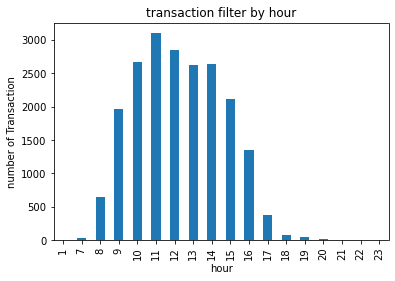

In [14]:
import matplotlib.pyplot as plt
group_hour.plot(kind='bar')
plt.xlabel('hour')
plt.ylabel('number of Transaction')
plt.title('transaction filter by hour')

Text(0.5, 1.0, 'transaction filter by day')

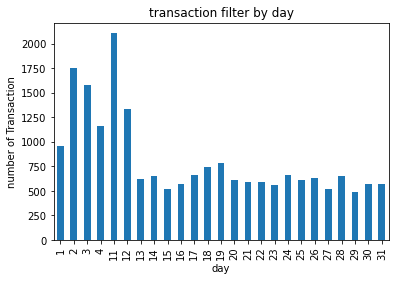

In [15]:
df['daycount'] = 1
df['day'] = df['DateTime'].map(lambda x:x.day)
group_day=df.groupby(by='day').count()['daycount']
group_day.plot(kind='bar')
plt.xlabel('day')
plt.ylabel('number of Transaction')
plt.title('transaction filter by day')

Text(0.5, 1.0, 'transaction filter by weekday')

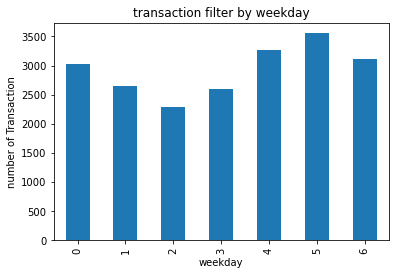

In [16]:
df['weekcount']=1
df['weekday']=df['DateTime'].map(lambda x:x.weekday())
group_weekday = df.groupby(by='weekday').count()['weekcount']
group_weekday.plot(kind='bar')
plt.xlabel('weekday')
plt.ylabel('number of Transaction')
plt.title('transaction filter by weekday')
#Wednesday has the fewest orders

In [17]:
df1 = df[df['year'] == 2016]
top_items_1 = df1.Items.value_counts()[:10]
other_items_1 = df1.Items.count() - top_items_1.sum()
item_list_1 = top_items_1.append(pd.Series([other_items_1], index=["Others"]))
item_list_1

C:\Users\sachi\AppData\Local\Temp\ipykernel_5160\2006646385.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  item_list_1 = top_items_1.append(pd.Series([other_items_1], index=["Others"]))


Coffee           2214
Bread            1390
Tea               577
Pastry            366
Medialuna         362
Cake              263
Hot chocolate     261
Sandwich          235
Farm House        200
Muffin            198
Others           2078
dtype: int64

In [18]:
df2 = df[df['year'] == 2017]
top_items_2 = df2.Items.value_counts()[:10]
other_items_2 = df2.Items.count() - top_items_2.sum()
item_list_2 = top_items_2.append(pd.Series([other_items_2], index=["Others"]))
item_list_2

C:\Users\sachi\AppData\Local\Temp\ipykernel_5160\2329828259.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  item_list_2 = top_items_2.append(pd.Series([other_items_2], index=["Others"]))


Coffee           3257
Bread            1935
Tea               858
Cake              762
Sandwich          536
Pastry            490
Cookies           374
Hot chocolate     329
Juice             259
Scone             258
Others           3305
dtype: int64

In [19]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly

plotly.offline.init_notebook_mode(connected=True)
values_1 = item_list_1.tolist()
labels_1 = item_list_1.index.values.tolist()
fig = {
  "data": [
    {
      "values": values_1,
      "labels": labels_1,
      "domain": {"x": [0, .5]},
      "name": "Top 10 Items",
      "hoverinfo":"label+percent+name",
      "type": "pie"
    },],
  "layout": {
        "title":"Top 10 Most Popular Items",
    }
}
iplot(fig)


In [20]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly

plotly.offline.init_notebook_mode(connected=True)
values_2 = item_list_2.tolist()
labels_2 = item_list_2.index.values.tolist()
fig = {
  "data": [
    {
      "values": values_2,
      "labels": labels_2,
      "domain": {"x": [0, .5]},
      "name": "Top 10 Items",
      "hoverinfo":"label+percent+name",
      "type": "pie"
    },],
  "layout": {
        "title":"Top 10 Most Popular Items",
    }
}
iplot(fig)


In [21]:
df_associa=df[['TransactionNo', 'Items']]
df_associa

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
...,...,...
20502,9682,Coffee
20503,9682,Tea
20504,9683,Coffee
20505,9683,Pastry


In [22]:
 df_associa1= df_associa.groupby('TransactionNo').agg(','.join).reset_index()

In [23]:
df_associa1

,TransactionNo,Items
0,1,Bread
1,2,"Scandinavian,Scandinavian"
2,3,"Hot chocolate,Jam,Cookies"
3,4,Muffin
4,5,"Coffee,Pastry,Bread"
...,...,...
9460,9680,Bread
9461,9681,"Truffles,Tea,Spanish Brunch,Christmas common"
9462,9682,"Muffin,Tacos/Fajita,Coffee,Tea"
9463,9683,"Coffee,Pastry"


In [24]:
items_list = [item.split(',') for item in df_associa1['Items']]
items_list

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna', 'Bread'],
 ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['Mineral water', 'Scandinavian'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread'],
 ['Bread', 'Tea'],
 ['Scandinavian'],
 ['Juice', 'Tartine', 

In [25]:
items_series = pd.DataFrame(pd.Series(items_list))
items_series.columns = ["transactions"]
items_series

,transactions
0,[Bread]
1,"[Scandinavian, Scandinavian]"
2,"[Hot chocolate, Jam, Cookies]"
3,[Muffin]
4,"[Coffee, Pastry, Bread]"
...,...
9460,[Bread]
9461,"[Truffles, Tea, Spanish Brunch, Christmas common]"
9462,"[Muffin, Tacos/Fajita, Coffee, Tea]"
9463,"[Coffee, Pastry]"


In [28]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

X = items_series['transactions'].str.join(sep = '*').str.get_dummies(sep = '*')
X.shape
frequent_itemsets = apriori(X, min_support = 0.0075, max_len = 4, use_colnames =
 True)
X

C:\Users\sachi\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


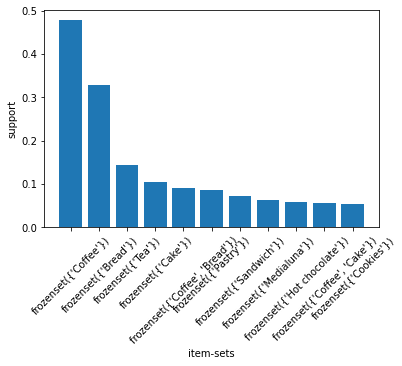

In [29]:
frequent_itemsets.sort_values('support', ascending = False, inplace = True)

plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11])
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=45)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()


In [30]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
39,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
31,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
30,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
47,(Tea),(Soup),0.142631,0.034443,0.009086,0.063704,1.849557,0.004174,1.031252
46,(Soup),(Tea),0.034443,0.142631,0.009086,0.263804,1.849557,0.004174,1.164593
45,(Pastry),(Medialuna),0.086107,0.061807,0.009192,0.106748,1.727135,0.003870,1.050313
44,(Medialuna),(Pastry),0.061807,0.086107,0.009192,0.148718,1.727135,0.003870,1.073549
50,(Scone),(Tea),0.034548,0.142631,0.008347,0.241590,1.693816,0.003419,1.130483
51,(Tea),(Scone),0.142631,0.034548,0.008347,0.058519,1.693816,0.003419,1.025460
